In [42]:
%matplotlib inline
import numpy as N
import pylab as P
from astropy.table import Table, vstack, Column
from astropy import units as u
from scipy.stats import kde
from scipy.stats import binned_statistic as b_s

In [2]:
from astropy.cosmology import FlatLambdaCDM
#cosmo = FlatLambdaCDM(H0 = 71.0, Om0 = 0.26)
cosmo = FlatLambdaCDM(H0 = 75.0, Om0 = 0.3)
c = 299792.458 * u.km/u.s

In [50]:
import os
os.environ['PATH'] = os.environ['PATH'] + ':/usr/texbin'

P.rc('figure', facecolor='none', edgecolor='none', autolayout=True)
P.rc('path', simplify=True)
P.rc('text', usetex=True)
P.rc('font', family='serif')
P.rc('axes', labelsize='large', facecolor='none', linewidth=0.7, color_cycle = ['k', 'r', 'g', 'b', 'c', 'm', 'y'])
P.rc('xtick', labelsize='medium')
P.rc('ytick', labelsize='medium')
P.rc('lines', markersize=4, linewidth=1, markeredgewidth=0.2)
P.rc('legend', numpoints=1, frameon=False, handletextpad=0.3, scatterpoints=1, handlelength=2, handleheight=0.1)
P.rc('savefig', facecolor='none', edgecolor='none', frameon='False')

params =   {'font.size' : 14,
            'xtick.major.size': 8,
            'ytick.major.size': 8,
            'xtick.minor.size': 3,
            'ytick.minor.size': 3,
            }
P.rcParams.update(params) 

In [3]:
data= Table.read('mr181920_members_catalog_with_berlind_group_data_central_or_satellite_MPA_JHU_cent_mass_r200_rp_gz2-galex_best_fit_t_tau.fits', format='fits')

In [4]:
data = data[N.where(N.logical_and(N.logical_and(data['stellar mass of central']> 0, data['AVG_MASS_1']>0), data['REDSHIFT'] < 0.084))]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [7]:
sat = data[N.where(data['central or satellite']==0)]
cent = data[N.where(data['central or satellite']==1)]

qsat = sat[N.where(sat['AVG_SFR_1']< sat['peng']-0.3)]
qcent = cent[N.where(cent['AVG_SFR_1']< cent['peng']-0.3)]

In [16]:
len(qsat)

3916

In [17]:
fields = Table.read('field_cand_sample_matched_satellite_stellar_mass_bins_0.3_sfr_h_alpha_masses_balrdy_env_lt_-0.8_rv_gtr_25_MPA_JHU_sfrs.fits', format='fits')

In [18]:
fieldc = Table.read('field_cand_sample_matched_cent_groups_stellar_mass_bins_0.2_sfr_h_alpha_masses_balrdy_env_lt_-0.8_gt_-999_rv_gtr_25_bestfit_t_tau_MPA_JHU.fits', format='fits')

In [36]:
qfieldc = fieldc[N.where(N.logical_and(fieldc['AVG_SFR'] < fieldc['peng']-0.3, fieldc['t01_smooth_or_features_a01_smooth_debiased']>=0))]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


In [21]:
gz2 = Table.read('MPA_JHU_MASS_SFR.fit', format='fits')

### First let's make Figure 1 - the MASS against the SFR for centrals and satellites

In [23]:
H, X, Y = N.histogram2d(gz2['AVG_MASS'], gz2['AVG_SFR'], range=((8,12),(-2,2)), bins=55)
Hc, Xc, Yc = N.histogram2d(qcent['AVG_MASS_1'], qcent['AVG_SFR_1'], range=((8,12),(-2,2)), bins=20)
Hs, Xs, Ys = N.histogram2d(qsat['AVG_MASS_1'], qsat['AVG_SFR_1'], range=((8,12),(-2,2)), bins=20)

In [29]:
x = qcent['AVG_MASS_1']
y = qcent['AVG_SFR_1']
Xc, Yc = N.mgrid[8:12:30j, -2:2:30j]
pos = N.vstack([Xc.ravel(), Yc.ravel()])
density = kde.gaussian_kde(N.vstack([x,y]))
Hc = N.reshape(density(pos).T, Xc.shape)

In [30]:
x = qsat['AVG_MASS_1']
y = qsat['AVG_SFR_1']
Xs, Ys = N.mgrid[8:12:30j, -2:2:30j]
pos = N.vstack([Xs.ravel(), Ys.ravel()])
density = kde.gaussian_kde(N.vstack([x,y]))
Hs = N.reshape(density(pos).T, Xs.shape)

In [25]:
ms = N.linspace(1E8, 1E12, 51)
#sfr_138 = N.log10(peng_sfr(ms, cosmo.age(0).value))
sfr_138 = 0.857*N.log10(ms) - 8.4

/usr/local/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


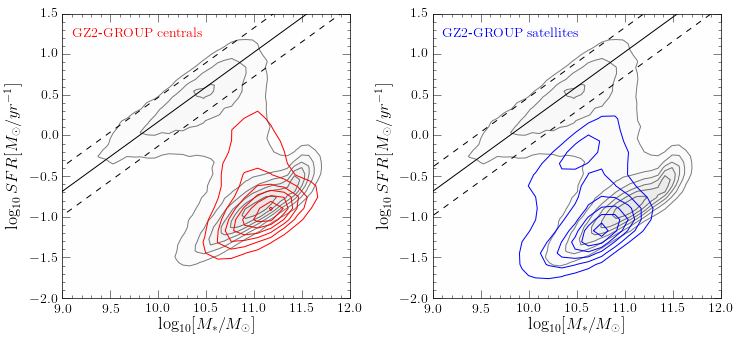

In [33]:
P.figure(figsize=(10.5,5))
ax1 = P.subplot(121)
ax1.minorticks_on()
ax1.contour(X[:-1], Y[:-1], H.T, origin='lower', colors='k', alpha=0.5)
ax1.contourf(X[:-1], Y[:-1], H.T, origin='lower', cmap=P.cm.Greys, alpha=0.1)
ax1.contour(Xc, Yc, Hc, origin='lower', colors='r')
ax1.plot(N.log10(ms), sfr_138, color='k')
ax1.plot(N.log10(ms), sfr_138+0.3, color='k', linestyle='dashed')
ax1.plot(N.log10(ms), sfr_138-0.3, color='k', linestyle='dashed')
# ax1.scatter(qcent['AVG_MASS'], qcent['AVG_SFR'], color='r', marker='s', alpha=0.5)
# ax1.scatter(qsat['AVG_MASS'], qsat['AVG_SFR'], color='k', marker='x', alpha=0.3)
ax1.set_xlabel(r'$\log_{10}[M_*/M_{\odot}]$')
ax1.set_ylabel(r'$\log_{10}SFR [M_{\odot}/yr^{-1}]$')
ax1.set_xlim(9, 12)
ax1.set_ylim(-2,1.5)
ax1.text(9.1, 1.2, r'$\rm{GZ2}$-$\rm{GROUP}$ $\rm{centrals}$', color='r')
ax1 = P.subplot(122)
ax1.minorticks_on()
ax1.contour(X[:-1], Y[:-1], H.T, origin='lower', colors='k', alpha=0.5)
ax1.contourf(X[:-1], Y[:-1], H.T, origin='lower', cmap=P.cm.Greys, alpha=0.1)
ax1.contour(Xs, Ys, Hs, origin='lower', colors='b')
ax1.plot(N.log10(ms), sfr_138, color='k')
ax1.plot(N.log10(ms), sfr_138+0.3, color='k', linestyle='dashed')
ax1.plot(N.log10(ms), sfr_138-0.3, color='k', linestyle='dashed')
# ax1.scatter(qcent['AVG_MASS'], qcent['AVG_SFR'], color='r', marker='s', alpha=0.5)
# ax1.scatter(qsat['AVG_MASS'], qsat['AVG_SFR'], color='k', marker='x', alpha=0.3)
ax1.set_xlabel(r'$\log_{10}[M_*/M_{\odot}]$')
ax1.set_ylabel(r'$\log_{10}SFR [M_{\odot}/yr^{-1}]$')
ax1.set_xlim(9, 12)
ax1.set_ylim(-2,1.5)
ax1.text(9.1, 1.2, r'$\rm{GZ2}$-$\rm{GROUP}$ $\rm{satellites}$', color='b')
P.tight_layout()
P.savefig('sfr_mass_quenched_centrals_satellites_gz2_group.pdf')

### Now let's look at Figure 2 - the redshift distributions of the field matched sample 

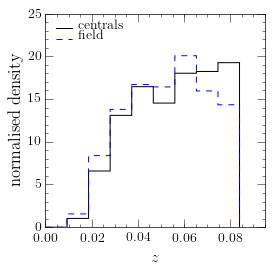

In [37]:
linetypes = ['solid','dashed']
colours = ['k', 'b']
labels=[r'$\rm{centrals}$', r'$\rm{field}$']
P.figure(figsize=(4,4))
ax = P.subplot(111)
ax.hist(qcent['REDSHIFT'], bins=9, range=(0, 0.084), histtype='step', color='k', normed=True, lw=1)
ax.hist(qfieldc['REDSHIFT_1'], bins=9, range=(0, 0.084), histtype='step', color='b', linestyle='dashed', normed=True, lw=1)
for n in range(2):
    ax.axhline((0.725+(0.2*(4-float(n))/4))*25.15, 0.05, 0.12, linestyle=linetypes[n],color=colours[n], lw=1)
    ax.text(0.15, 0.725+(0.2*(4-n)/4), labels[n], transform=ax.transAxes, fontsize=14)
#ax.hist(cent_t_since, bins=20, range=(0, 9), histtype='step', color='r', normed=True, label='quenching centrals')
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$\rm{normalised}$ $\rm{density}$')
ax.minorticks_on()
ax.set_xlim(0, 0.095)
P.savefig('redshift_cent_field.pdf')

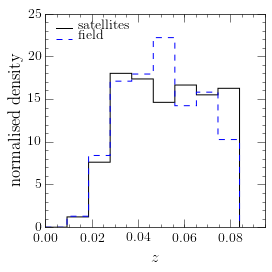

In [40]:
linetypes = ['solid','dashed']
colours = ['k', 'b']
labels=[r'$\rm{satellites}$', r'$\rm{field}$']
P.figure(figsize=(4,4))
ax = P.subplot(111)
ax.hist(qsat['REDSHIFT'], bins=9, range=(0, 0.084), histtype='step', color='k', normed=True, lw=1)
ax.hist(fields['REDSHIFT'], bins=9, range=(0, 0.084), histtype='step', color='b', linestyle='dashed', normed=True, lw=1)
for n in range(2):
    ax.axhline((0.725+(0.2*(4-float(n))/4))*25.15, 0.05, 0.12, linestyle=linetypes[n],color=colours[n], lw=1)
    ax.text(0.15, 0.725+(0.2*(4-n)/4), labels[n], transform=ax.transAxes, fontsize=14)
#ax.hist(cent_t_since, bins=20, range=(0, 9), histtype='step', color='r', normed=True, label='quenching centrals')
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$\rm{normalised}$ $\rm{density}$')
ax.minorticks_on()
ax.set_xlim(0, 0.095)
P.savefig('redshift_sat_field.pdf')

### Now let's look at Figure 3 - the average stellar mass with redshift 

In [44]:
logbins = N.append(N.linspace(0, 1, 6),  N.linspace(2, 15, 8), axis=0)

In [107]:
bsmass25 = b_s((sat['projected cluster centric radius'].to(u.Mpc))/sat['virial radius r200'], sat['AVG_MASS_1'], statistic=lambda y: N.percentile(y, 25), bins=logbins)
bsmass50 = b_s((sat['projected cluster centric radius'].to(u.Mpc))/sat['virial radius r200'], sat['AVG_MASS_1'], statistic=lambda y: N.percentile(y, 50), bins=logbins)
bsmass75 = b_s((sat['projected cluster centric radius'].to(u.Mpc))/sat['virial radius r200'], sat['AVG_MASS_1'], statistic=lambda y: N.percentile(y, 75), bins=logbins)

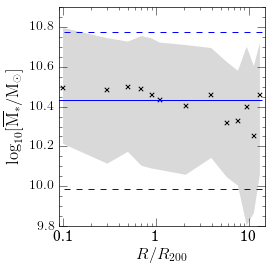

In [109]:
P.figure(figsize=(4,4))
ax = P.subplot(111)
ax.scatter(bsmass50[1][:-1] + N.diff(bsmass50[1])[0]/2, bsmass50[0], marker='x', color='k')
ax.fill_between(bsmass50[1][:-1] + N.diff(bsmass50[1])[0]/2, bsmass25[0], bsmass75[0], color='k', alpha=0.15, edgecolor='None')
ax.hlines(N.percentile(fields['AVG_MASS'], [25, 50, 75]), 0, 14, color=['b', 'b','b'], linestyle=['dashed', 'solid', 'dashed'])
ax.set_xscale('log')
ax.minorticks_on()
ax.set_xlim(0.09, 15)
#ax.set_ylim(0, 0.05)
ax.set_xlabel(r'$R/R_{200}$')
ax.set_ylabel(r'$\rm{\log_{10}[\overline{M}_{*}/M_{\odot}]}$')
ax.set_xticks([0.1, 1, 10])
ax.set_xticklabels([0.1, 1, 10])
ax.set_ylim(9.8, 10.9)
P.tight_layout()
P.savefig('mass_trend_with_log_radius_compare_field.pdf', frameon=False, bbox_inches='tight', pad_inches=0.1, transparent=True)

### Now let's look at Figure 4 - how do p_disc and p_smooth change with radius?

In [110]:
bsd = b_s((sat['projected cluster centric radius'].to(u.Mpc))/sat['virial radius r200'], sat['t01_smooth_or_features_a02_features_or_disk_debiased'], statistic='mean', bins=logbins, range=(0,15))
bsdstd = b_s((sat['projected cluster centric radius'].to(u.Mpc))/sat['virial radius r200'], sat['t01_smooth_or_features_a02_features_or_disk_debiased'], statistic=N.std, bins=logbins, range=(0,15))
y1d = bsd[0] + bsdstd[0]**2
y2d = bsd[0] - bsdstd[0]**2
bss = b_s((sat['projected cluster centric radius'].to(u.Mpc))/sat['virial radius r200'], sat['t01_smooth_or_features_a01_smooth_debiased'], statistic='mean', bins=logbins, range=(0,15))
bssstd = b_s((sat['projected cluster centric radius'].to(u.Mpc))/sat['virial radius r200'], sat['t01_smooth_or_features_a01_smooth_debiased'], statistic=N.std, bins=logbins, range=(0,15))
y1s = bss[0] + bssstd[0]**2
y2s = bss[0] - bssstd[0]**2

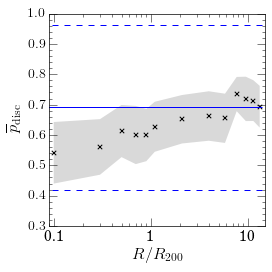

In [111]:
P.figure(figsize=(4,4))
ax = P.subplot(111)
ax.scatter(bsd[1][:-1] + N.diff(bsd[1])[0]/2, bsd[0], marker='x', color='k')
ax.fill_between(bsd[1][:-1] + N.diff(bsd[1])[0]/2, y1d, y2d, color='k', alpha=0.15, edgecolor='None')
ax.hlines([N.mean(fields['t01_smooth_or_features_a02_features_or_disk_debiased'])+N.std(fields['t01_smooth_or_features_a02_features_or_disk_debiased']), N.mean(fields['t01_smooth_or_features_a02_features_or_disk_debiased']), N.mean(fields['t01_smooth_or_features_a02_features_or_disk_debiased'])-N.std(fields['t01_smooth_or_features_a02_features_or_disk_debiased'])], 0, 14, color='b', linestyle=['dashed', 'solid', 'dashed'])
ax.set_xscale('log')
ax.minorticks_on()
ax.set_xlim(0.09, 15)
ax.set_xlabel(r'$R/R_{200}$')
ax.set_ylabel(r'$\overline{p}_{\rm{disc}}$')
ax.set_xticks([0.1, 1, 10])
ax.set_xticklabels([0.1, 1, 10])
P.savefig('p_disc_trend_with_log_radius_field_compare.pdf')

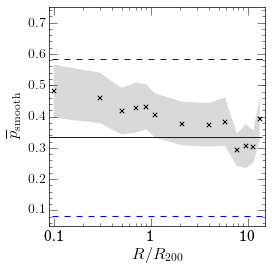

In [112]:
P.figure(figsize=(4,4))
ax = P.subplot(111)
ax.scatter(bss[1][:-1] + N.diff(bss[1])[0]/2, bss[0], marker='x', color='k')
ax.fill_between(bss[1][:-1] + N.diff(bss[1])[0]/2, y1s, y2s, color='k', alpha=0.15, edgecolor='None')
ax.hlines([N.mean(fields['t01_smooth_or_features_a01_smooth_debiased'])+N.std(fields['t01_smooth_or_features_a01_smooth_debiased']), N.mean(fields['t01_smooth_or_features_a01_smooth_debiased']), N.mean(fields['t01_smooth_or_features_a01_smooth_debiased'])-N.std(fields['t01_smooth_or_features_a01_smooth_debiased'])], 0, 14, color='b', linestyle=['dashed', 'solid', 'dashed'])
ax.set_xscale('log')
ax.minorticks_on()
ax.set_xlim(0.09, 15)
ax.set_xlabel(r'$R/R_{200}$')
ax.set_ylabel(r'$\overline{p}_{\rm{smooth}}$')
ax.set_xticks([0.1, 1, 10])
ax.set_xticklabels([0.1, 1, 10])
ax.set_ylim(0.05, 0.75)
P.savefig('p_smooth_trend_with_log_radius_field_compare.pdf')

### Now for Figure 5 - how the bar fraciton changes with radius

In [113]:
discs = sat[N.where(N.logical_and(sat['t01_smooth_or_features_a02_features_or_disk_debiased'] > 0.430, sat['t02_edgeon_a05_no_debiased']>0.715, sat['t02_edgeon_a05_no_count']>=20))]

In [114]:
discsf = fields[N.where(N.logical_and(fields['t01_smooth_or_features_a02_features_or_disk_debiased'] > 0.430, fields['t02_edgeon_a05_no_debiased']>0.715, fields['t02_edgeon_a05_no_count']>=20))]

In [66]:
maxm = N.max(discs['AVG_MASS_1'])
minm = N.min(discs['AVG_MASS_1'])
hweight = (discs['AVG_MASS_1']-minm)/(maxm-minm)
lweight = 1 - hweight

In [115]:
bso = b_s((sat['projected cluster centric radius'].to(u.Mpc))/sat['virial radius r200'], sat['t06_odd_a14_yes_debiased'], statistic='median', bins=logbins, range=(0,15))

In [116]:
idxrs = N.digitize((sat['projected cluster centric radius'].to(u.Mpc))/sat['virial radius r200'], logbins)
idxds = N.digitize((discs['projected cluster centric radius'].to(u.Mpc))/discs['virial radius r200'], logbins)
frac_b = [len(discs[discs['t03_bar_a06_bar_debiased'][idxds==k]>=0.6])/float(len(discs[idxds==k])+1) for k in range(len(logbins))]
frac_bl = [N.sum(lweight[discs['t03_bar_a06_bar_debiased'][idxds==k]>=0.6])/float(len(discs[idxds==k])+1) for k in range(len(logbins))]
num_b = [float(len(discs[discs['t03_bar_a06_bar_debiased'][idxds==k]>=0.6])) for k in range(len(logbins))]
num_t = [float(len(discs[idxds==k])+1) for k in range(len(logbins))]
error_frac_b = N.nan_to_num(frac_b*N.sqrt((1/N.array(num_b))+(1/N.array(num_t))))
y1eb = frac_b + error_frac_b
y2eb = frac_b - error_frac_b
frac_bar_field = len(discsf[discsf['t03_bar_a06_bar_debiased']>=0.6])/float(len(discsf)+1)
num_bf = [float(len(discsf[discsf['t03_bar_a06_bar_debiased']>=0.6]))]
num_tf = [float(len(discsf)+1)]
error_frac_bar_field = N.nan_to_num(frac_bar_field*N.sqrt((1/N.array(num_bf))+(1/N.array(num_tf))))
y1ebarf = frac_bar_field + error_frac_bar_field
y2ebarf = frac_bar_field - error_frac_bar_field

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in multiply


In [118]:
frac_b

[0.0,
 0.21100917431192662,
 0.1956521739130435,
 0.16140350877192983,
 0.20802919708029197,
 0.13688212927756654,
 0.14921465968586387,
 0.15151515151515152,
 0.13479623824451412,
 0.06896551724137931,
 0.08333333333333333,
 0.15625,
 0.0,
 0.18181818181818182]

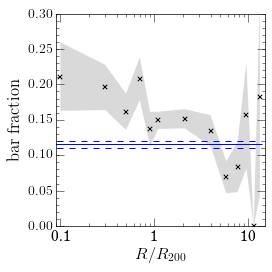

In [122]:
P.figure(figsize=(4,4))
ax = P.subplot(111)
ax.scatter(bso[1][:-1] + N.diff(bso[1])[0]/2, frac_b[1:], marker='x', color='k')
ax.fill_between(bso[1][:-1] + N.diff(bso[1])[0]/2, y1eb[1:], y2eb[1:], color='k', alpha=0.15, edgecolor='None')
ax.hlines([y1ebarf, frac_bar_field, y2ebarf], 0, 14, color=['b', 'b','b'], linestyle=['dashed', 'solid', 'dashed'])
ax.set_xscale('log')
ax.minorticks_on()
ax.set_xlim(0.09, 15)
ax.set_ylim(ymin=0.0, ymax=0.3)
ax.set_xlabel(r'$R/R_{200}$')
ax.set_ylabel(r'$\rm{bar}$ $\rm{fraction}$')
ax.set_xticks([0.1, 1, 10])
ax.set_xticklabels([0.1, 1, 10])
P.tight_layout()
P.savefig('bar_fraction_over_disc_trend_with_log_radius_sat_matched_field_cand.pdf')

### Now let's look at Figure 6 - the merger fraction 

In [124]:
idxrs = N.digitize((sat['projected cluster centric radius'].to(u.Mpc))/sat['virial radius r200'], logbins)
frac_m = [len(sat[sat['t08_odd_feature_a24_merger_debiased'][idxrs==k]>=0.3])/float(len(sat[idxrs==k])+1) for k in range(len(logbins))]
num_m = [float(len(sat[sat['t08_odd_feature_a24_merger_debiased'][idxrs==k]>=0.3])) for k in range(len(logbins))]
num_t = [float(len(sat[idxrs==k])+1) for k in range(len(logbins))]
error_frac_m = N.nan_to_num(frac_m*N.sqrt((1/N.array(num_m))+(1/N.array(num_t))))
y1em = frac_m + error_frac_m
y2em = frac_m - error_frac_m
frac_m_field = len(fields[fields['t08_odd_feature_a24_merger_debiased']>=0.3])/float(len(fields))
error_frac_m_field = N.nan_to_num(frac_m_field*N.sqrt((1/float(len(fields[fields['t08_odd_feature_a24_merger_debiased']>=0.4])))+(1/float(len(fields)))))
y1emf = frac_m_field + error_frac_m_field
y2emf = frac_m_field - error_frac_m_field

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in multiply


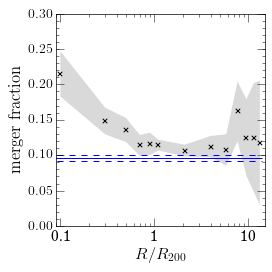

In [125]:
P.figure(figsize=(4,4))
ax = P.subplot(111)
ax.scatter(bso[1][:-1] + N.diff(bso[1])[0]/2, frac_m[1:], marker='x', color='k')
ax.fill_between(bso[1][:-1] + N.diff(bso[1])[0]/2, y1em[1:], y2em[1:], color='k', alpha=0.15, edgecolor='None')
ax.hlines([y1emf, frac_m_field, y2emf], 0, 14, color=['b', 'b','b'], linestyle=['dashed', 'solid', 'dashed'])
ax.set_xscale('log')
ax.minorticks_on()
ax.set_xlim(0.09, 15)
ax.set_ylim(ymin=0)
ax.set_xlabel(r'$R/R_{200}$')
ax.set_ylabel(r'$\rm{merger}$ $\rm{fraction}$')
ax.set_xticks([0.1, 1, 10])
ax.set_xticklabels([0.1, 1, 10])
P.tight_layout()
P.savefig('merger_fraction_trend_with_log_radius_compare_field.pdf')

### Now let's look at Figure 7- bulge fraction with radius

In [126]:
lim = 0.5
idxs = N.digitize((discs['projected cluster centric radius'].to(u.Mpc))/discs['virial radius r200'], logbins)
num_t = [float(len(data[idxs==k])+1) for k in range(len(logbins))]
frac_nb = [len(discs[discs['t05_bulge_prominence_a10_no_bulge_debiased'][idxs==k]>=lim])/float(len(discs[idxs==k])+1) for k in range(len(logbins))]
num_nb = [float(len(discs[discs['t05_bulge_prominence_a10_no_bulge_debiased'][idxs==k]>=lim])) for k in range(len(logbins))]
error_frac_nb = N.nan_to_num(frac_nb*N.sqrt((1/N.array(num_nb))+(1/N.array(num_t))))
y1enb = frac_nb + error_frac_nb
y2enb = frac_nb - error_frac_nb
frac_jnb = [len(discs[discs['t05_bulge_prominence_a11_just_noticeable_debiased'][idxs==k]>=lim])/float(len(discs[idxs==k])+1) for k in range(len(logbins))]
num_jnb = [float(len(discs[discs['t05_bulge_prominence_a11_just_noticeable_debiased'][idxs==k]>=lim])) for k in range(len(logbins))]
error_frac_jnb = N.nan_to_num(frac_jnb*N.sqrt((1/N.array(num_jnb))+(1/N.array(num_t))))
y1ejnb = frac_jnb + error_frac_jnb
y2ejnb = frac_jnb - error_frac_jnb
frac_ob = [len(discs[discs['t05_bulge_prominence_a12_obvious_debiased'][idxs==k]>=lim])/float(len(discs[idxs==k])+1) for k in range(len(logbins))]
num_ob = [float(len(discs[discs['t05_bulge_prominence_a12_obvious_debiased'][idxs==k]>=lim])) for k in range(len(logbins))]
error_frac_ob = N.nan_to_num(frac_ob*N.sqrt((1/N.array(num_ob))+(1/N.array(num_t))))
y1eob = frac_ob + error_frac_ob
y2eob = frac_ob - error_frac_ob
frac_db = [len(discs[discs['t05_bulge_prominence_a13_dominant_debiased'][idxs==k]>=lim])/float(len(discs[idxs==k])+1) for k in range(len(logbins))]
num_db = [float(len(discs[discs['t05_bulge_prominence_a13_dominant_debiased'][idxs==k]>=lim])) for k in range(len(logbins))]
error_frac_db = N.nan_to_num(frac_db*N.sqrt((1/N.array(num_db))+(1/N.array(num_t))))
y1edb = frac_db + error_frac_db
y2edb = frac_db - error_frac_db
frac_minb = [(len(discs[discs['t05_bulge_prominence_a10_no_bulge_debiased'][idxs==k]>=lim])+len(discs[discs['t05_bulge_prominence_a11_just_noticeable_debiased'][idxs==k]>=lim]))/float(len(discs[idxs==k])+1) for k in range(len(logbins))]
num_minb = [float(len(discs[discs['t05_bulge_prominence_a10_no_bulge_debiased'][idxs==k]>=lim])+len(discs[discs['t05_bulge_prominence_a11_just_noticeable_debiased'][idxs==k]>=lim])) for k in range(len(logbins))]
error_frac_minb = N.nan_to_num(frac_minb*N.sqrt((1/N.array(num_minb))+(1/N.array(num_t))))
l_frac_minb = map(lambda x,y: str(int(x))+'/'+str(int(y)), num_minb,num_t) 
y1eminb = frac_minb + error_frac_minb
y2eminb = frac_minb - error_frac_minb
frac_maxb = [(len(discs[discs['t05_bulge_prominence_a12_obvious_debiased'][idxs==k]>=lim])+len(discs[discs['t05_bulge_prominence_a13_dominant_debiased'][idxs==k]>=lim]))/float(len(discs[idxs==k])+1) for k in range(len(logbins))]
num_maxb = [float(len(discs[discs['t05_bulge_prominence_a12_obvious_debiased'][idxs==k]>=lim])+len(discs[discs['t05_bulge_prominence_a13_dominant_debiased'][idxs==k]>=lim])) for k in range(len(logbins))]
error_frac_maxb = N.nan_to_num(frac_maxb*N.sqrt((1/N.array(num_maxb))+(1/N.array(num_t))))
l_frac_maxb = map(lambda x,y: str(int(x))+'/'+str(int(y)), num_maxb,num_t) 
y1emaxb = frac_maxb + error_frac_maxb
y2emaxb = frac_maxb - error_frac_maxb

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python2.7/site-packages/ipykernel/__mai

In [127]:
num_tf = [float(len(discsf)+1)]
frac_minbf = [(len(discsf[discsf['t05_bulge_prominence_a10_no_bulge_debiased']>=lim])+len(discsf[discsf['t05_bulge_prominence_a11_just_noticeable_debiased']>=lim]))/float(len(discsf)+1)]
num_minbf = [float(len(discsf[discsf['t05_bulge_prominence_a10_no_bulge_debiased']>=lim])+len(discsf[discsf['t05_bulge_prominence_a11_just_noticeable_debiased']>=lim]))]
error_frac_minbf = N.nan_to_num(frac_minbf*N.sqrt((1/N.array(num_minbf))+(1/N.array(num_tf))))
l_frac_minbf = map(lambda x,y: str(int(x))+'/'+str(int(y)), num_minbf,num_tf) 
y1eminbf = frac_minbf + error_frac_minbf
y2eminbf = frac_minbf - error_frac_minbf
frac_maxbf = [(len(discsf[discsf['t05_bulge_prominence_a12_obvious_debiased']>=lim])+len(discsf[discsf['t05_bulge_prominence_a13_dominant_debiased']>=lim]))/float(len(discsf)+1)]
num_maxbf = [float(len(discsf[discsf['t05_bulge_prominence_a12_obvious_debiased']>=lim])+len(discsf[discsf['t05_bulge_prominence_a13_dominant_debiased']>=lim]))]
error_frac_maxbf = N.nan_to_num(frac_maxbf*N.sqrt((1/N.array(num_maxbf))+(1/N.array(num_tf))))
l_frac_maxbf = map(lambda x,y: str(int(x))+'/'+str(int(y)), num_maxbf,num_tf) 
y1emaxbf = frac_maxbf + error_frac_maxbf
y2emaxbf = frac_maxbf - error_frac_maxbf


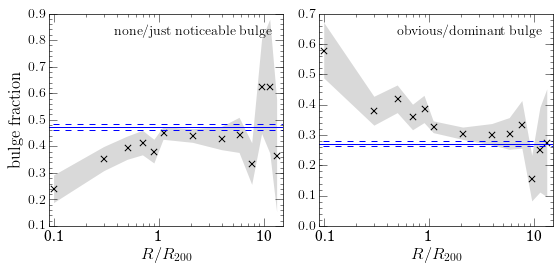

In [130]:
P.figure(figsize=(8,4))
ax = P.subplot(121)
ax.scatter(bso[1][:-1] + N.diff(bso[1])[0]/2, frac_minb[1:], marker='x', s=40, color='k')
ax.fill_between(bso[1][:-1] + N.diff(bso[1])[0]/2, y1eminb[1:], y2eminb[1:], color='k', alpha=0.15, edgecolor='None')
ax.hlines([y1eminbf, frac_minbf, y2eminbf], 0, 20, color=['b', 'b','b'], linestyle=['dashed', 'solid', 'dashed'])
# for i, txt in enumerate(l_frac_minb[1:]):
#     ax.annotate(txt, ((bso[1][:-1] + N.diff(bso[1])[0]/2)[i]+0.03,frac_minb[1:][i]-0.02), fontsize=9)
ax.text(0.95, 0.9, r'$\rm{none}/\rm{just}$ $\rm{noticeable}$ $\rm{bulge}$', ha='right',transform=ax.transAxes)
ax.set_xscale('log')
ax.minorticks_on()
ax.set_xlim(0.09, 15)
ax.set_ylim(0.1, 0.9)
ax.set_xlabel(r'$R/R_{200}$')
ax.set_ylabel(r'$\rm{bulge}$ $\rm{fraction}$')
ax.set_xticks([0.1, 1, 10])
ax.set_xticklabels([0.1, 1, 10])
ax.legend(frameon=False)
ax = P.subplot(122)
ax.scatter(bso[1][:-1] + N.diff(bso[1])[0]/2, frac_maxb[1:], marker='x', s=40, color='k')
ax.fill_between(bso[1][:-1] + N.diff(bso[1])[0]/2, y1emaxb[1:], y2emaxb[1:], color='k', alpha=0.15, edgecolor='None')
ax.hlines([y1emaxbf, frac_maxbf, y2emaxbf], 0, 20, color=['b', 'b','b'], linestyle=['dashed', 'solid', 'dashed'])
# for i, txt in enumerate(l_frac_maxb[1:]):
#     ax.annotate(txt, ((bso[1][:-1] + N.diff(bso[1])[0]/2)[i]+0.03,frac_maxb[1:][i]-0.03), fontsize=9, color='k')
ax.text(0.95, 0.9, r'$\rm{obvious}/\rm{dominant}$ $\rm{bulge}$', ha='right',transform=ax.transAxes)
ax.set_xscale('log')
ax.minorticks_on()
ax.set_xlim(0.09, 15)
ax.set_ylim(0.0, 0.7)
ax.set_xlabel(r'$R/R_{200}$')
#ax.set_ylabel(r'$\rm{bulge}$ $\rm{fraction}$')
ax.set_xticks([0.1, 1, 10])
ax.set_xticklabels([0.1, 1, 10])
ax.legend(frameon=False)
P.tight_layout()
P.savefig('min_max_bulge_fraction_trend_with_log_radius_all_field_cand.pdf')

### Now let's make Figures 8-10 looking at how t and tau change with radius 

In [156]:
from scipy.stats import binned_statistic_2d as bs2d
from scipy.stats import binned_statistic as bs
from astropy import units as un

In [146]:
qfieldc = fieldc[N.where(fieldc['AVG_SFR']<fieldc['peng']-0.3)]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


In [147]:
sat_t_since = cosmo.age(qsat['REDSHIFT']).value - qsat['best fit t']
sat_t_since_min = cosmo.age(qsat['REDSHIFT']).value - (qsat['best fit t'] + qsat['plus error t'])
sat_t_since_max = cosmo.age(qsat['REDSHIFT']).value - (qsat['best fit t'] - qsat['minus error t'])
cent_t_since = cosmo.age(qcent['REDSHIFT']).value - qcent['best fit t']
cent_t_since_min = cosmo.age(qcent['REDSHIFT']).value - (qcent['best fit t'] + qcent['plus error t'])
cent_t_since_max = cosmo.age(qcent['REDSHIFT']).value - (qcent['best fit t'] - qcent['minus error t'])
field_t_since = cosmo.age(qfieldc['z_1']).value - qfieldc['best fit t']
field_t_since_min = cosmo.age(qfieldc['z_1']).value - qfieldc['plus error t']
field_t_since_max = cosmo.age(qfieldc['z_1']).value - qfieldc['minus error t']

In [178]:
r_bins = N.append(N.append(N.linspace(0.1, 1, 6),  N.linspace(2, 14, 6), axis=0), 400)
mc_bins = N.array([9, 10.5, 11, 12])
m_bins = N.array([9, 10.5, 11, 12])
N_bins = N.array([3, 5, 15, 400])
v_bins = N.array([0, 75, 150, 400])
mu_bins = N.array([-2, -0.75, -0.25, 0])
delv_bins = N.array([0, 150, 250, 1000])

In [179]:
bs_m_qsat, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['AVG_MASS_1'], sat_t_since, bins=(r_bins, m_bins), statistic='median')
bs_m_qsat_min, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['AVG_MASS_1'], sat_t_since_min, bins=(r_bins, m_bins), statistic='median')
bs_m_qsat_max, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['AVG_MASS_1'], sat_t_since_max, bins=(r_bins, m_bins), statistic='median')
bs_mc_qsat, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['stellar mass of central'], sat_t_since, bins=(r_bins, mc_bins), statistic='median')
bs_mc_qsat_min, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['stellar mass of central'], sat_t_since_min, bins=(r_bins, mc_bins), statistic='median')
bs_mc_qsat_max, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['stellar mass of central'], sat_t_since_max, bins=(r_bins, mc_bins), statistic='median')
bs_N_qsat, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['N group'], sat_t_since, bins=(r_bins, N_bins), statistic='median')
bs_N_qsat_min, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['N group'], sat_t_since_min, bins=(r_bins, N_bins), statistic='median')
bs_N_qsat_max, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['N group'], sat_t_since_max, bins=(r_bins, N_bins), statistic='median')

In [180]:
bs_m_qcent, x, n = bs(qcent['AVG_MASS_1'], cent_t_since, bins=m_bins, statistic='median')
bs_m_qcent_min, x, n = bs(qcent['AVG_MASS_1'], cent_t_since_min, bins=m_bins, statistic='median')
bs_m_qcent_max, x, n = bs(qcent['AVG_MASS_1'], cent_t_since_max, bins=m_bins, statistic='median')
bs_mc_qcent, x, n = bs(qcent['stellar mass of central'], cent_t_since, bins=mc_bins, statistic='median')
bs_mc_qcent_min, x, n = bs(qcent['stellar mass of central'], cent_t_since_min, bins=mc_bins, statistic='median')
bs_mc_qcent_max, x, n = bs(qcent['stellar mass of central'], cent_t_since_max, bins=mc_bins, statistic='median')
bs_N_qcent, x, n = bs(qcent['N group'], cent_t_since, bins=N_bins, statistic='median')
bs_N_qcent_min, x, n = bs(qcent['N group'], cent_t_since_min, bins=N_bins, statistic='median')
bs_N_qcent_max, x, n = bs(qcent['N group'], cent_t_since_max, bins=N_bins, statistic='median')

In [181]:
bs_m_qfield, x, n = bs(qfieldc['stellar mass'], field_t_since, bins=m_bins, statistic='median')
bs_m_qfield_min, x, n = bs(qfieldc['stellar mass'], field_t_since_min, bins=m_bins, statistic='median')
bs_m_qfield_max, x, n = bs(qfieldc['stellar mass'], field_t_since_max, bins=m_bins, statistic='median')
bs_mc_qfield, x, n = bs(qfieldc['stellar mass'], field_t_since, bins=mc_bins, statistic='median')
bs_mc_qfield_min, x, n = bs(qfieldc['stellar mass'], field_t_since_min, bins=mc_bins, statistic='median')
bs_mc_qfield_max, x, n = bs(qfieldc['stellar mass'], field_t_since_max, bins=mc_bins, statistic='median')
bs_N_qfield = N.ones_like(bs_mc_qfield)*N.median(field_t_since)
bs_N_qfield_min, x, n = bs(qfieldc['stellar mass'], field_t_since_min, bins=N_bins, statistic='median')
bs_N_qfield_max, x, n = bs(qfieldc['stellar mass'], field_t_since_max, bins=N_bins, statistic='median')

In [182]:
bs_v_disp_qsat, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['V_DISP_1'], sat_t_since, bins=(r_bins, v_bins), statistic='median')
bs_mu_qsat, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], N.log10(10**(qsat['AVG_MASS_1'])/10**(qsat['stellar mass of central'])), sat_t_since, bins=(r_bins, mu_bins), statistic='median')
bs_delv_qsat, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], N.abs(qsat['delta v from central']), sat_t_since, bins=(r_bins, delv_bins), statistic='median')
bs_v_disp_qsat_min, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['V_DISP_1'], sat_t_since_min, bins=(r_bins, v_bins), statistic='median')
bs_v_disp_qsat_max, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['V_DISP_1'], sat_t_since_max, bins=(r_bins, v_bins), statistic='median')
bs_mu_qsat_min, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], N.log10(10**(qsat['AVG_MASS_1'])/10**(qsat['stellar mass of central'])), sat_t_since_min, bins=(r_bins, mu_bins), statistic='median')
bs_mu_qsat_max, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], N.log10(10**(qsat['AVG_MASS_1'])/10**(qsat['stellar mass of central'])), sat_t_since_max, bins=(r_bins, mu_bins), statistic='median')
bs_delv_qsat_min, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['delta v from central'], sat_t_since_min, bins=(r_bins, delv_bins), statistic='median')
bs_delv_qsat_max, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['delta v from central'], sat_t_since_max, bins=(r_bins, delv_bins), statistic='median')

bs_v_disp_qcent, x, n = bs(qcent['V_DISP_1'], cent_t_since, bins=v_bins, statistic='median')
bs_mu_qcent, x, n = bs(N.zeros(len(qcent)), cent_t_since, bins=mu_bins, statistic='median')
bs_delv_qcent, x, n = bs(qcent['delta v from central'], cent_t_since, bins=v_bins, statistic='median')
bs_v_disp_qcent_min, x, n = bs(qcent['V_DISP_1'], cent_t_since_min, bins=v_bins, statistic='median')
bs_v_disp_qcent_max, x, n = bs(qcent['V_DISP_1'], cent_t_since_max, bins=v_bins, statistic='median')

bs_v_disp_qfield, x, n = bs(qfieldc['V_DISP'], field_t_since, bins=v_bins, statistic='median')
bs_mu_qfield, x, n = bs(N.zeros(len(qfieldc)), field_t_since, bins=mu_bins, statistic='median')
bs_v_disp_qfield_min, x, n = bs(qfieldc['V_DISP'], field_t_since_min, bins=v_bins, statistic='median')
bs_v_disp_qfield_max, x, n = bs(qfieldc['V_DISP'], field_t_since_max, bins=v_bins, statistic='median')

In [183]:
colours = ['blue', 'black', 'red']

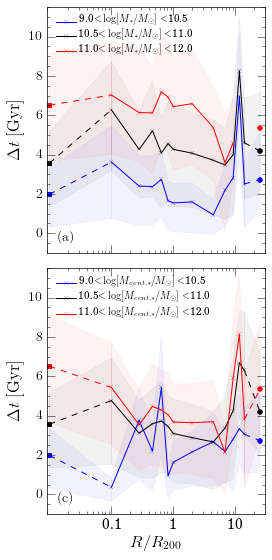

In [184]:
P.figure(figsize=(4, 8))
ax1 = P.subplot(211)
for n in range(0, len(m_bins)-1):
    ax1.plot(r_bins[:-1], bs_m_qsat[:,n], marker='x', color=colours[n], label=r''+str(m_bins[n])+'$ < \log [M_*/M_{\odot}] < $'+str(m_bins[n+1]), linewidth=1)
    ax1.fill_between(r_bins[:-1], y1=bs_m_qsat_min[:,n], y2=bs_m_qsat_max[:,n], color=colours[n], alpha=0.05)
    #ax1.errorbar(r_bins[:-1], bs_m_qsat[:,n], yerr = [bs_m_qsat_min[:,n], bs_m_qsat_max[:,n]], marker='None', fmt='None', ecolor=colours[n], alpha=0.8)
    ax1.plot([0.01, r_bins[0]], [bs_m_qcent[n], bs_m_qsat[0,n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([0.01, r_bins[0]], y1=[bs_m_qcent_min[n], bs_m_qsat_min[0,n]], y2=[bs_m_qcent_max[n], bs_m_qsat_max[0,n]], color=colours[n], alpha=0.05)
    ax1.plot([r_bins[-2], 25], [bs_m_qsat[-1,n], bs_m_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([r_bins[-2], 25], y1=[bs_m_qsat_min[-1,n], bs_m_qfield_min[n]], y2=[bs_m_qsat_max[-1,n], bs_m_qfield_max[n]], color=colours[n], alpha=0.05)
    ax1.scatter(0.01, bs_m_qcent[n], marker='s', s=20, color=colours[n])
    ax1.scatter(25, bs_m_qfield[n], marker='o', s=20, color=colours[n])
ax1.plot([r_bins[-4], r_bins[-2]], [bs_m_qsat[-3,n], bs_m_qsat[-1,n]], marker='None', color=colours[n], linewidth=1)
ax1.fill_between([r_bins[-4], r_bins[-2]], y1=[bs_m_qsat_min[-3, n], bs_m_qsat_min[-1,n]], y2=[bs_m_qsat_max[-3, n], bs_m_qsat_max[-1,n]], color=colours[n], alpha=0.05)
ax1.set_ylabel(r'$\Delta t$ $\rm{[Gyr]}$')
#ax1.set_xlabel(r'$R/R_{200}$')
ax1.set_xscale('log')
ax1.minorticks_on()
ax1.set_xlim(0.009, 30)
ax1.set_ylim(-1, 11.5)
ax1.legend(frameon=False, loc=2, fontsize=10)
ax1.set_xticks([0.1, 1, 10])
ax1.text(0.05, 0.05, r'$\rm(a)$', transform=ax1.transAxes, ha='left', color='k')
#ax1.set_xticklabels([0.1, 1, 10])
ax1.tick_params(labelbottom='off')
ax1 = P.subplot(212)
for n in range(0, len(mc_bins)-1):
    ax1.plot(r_bins[:-1], bs_mc_qsat[:,n], marker='x', color=colours[n], label=r''+str(mc_bins[n])+'$ < \log [M_{cent,*}/M_{\odot}] < $'+str(mc_bins[n+1]), linewidth=1)
    ax1.fill_between(r_bins[:-1], y1=bs_mc_qsat_min[:,n], y2=bs_mc_qsat_max[:,n], color=colours[n], alpha=0.05)
    ax1.plot([0.01, r_bins[0]], [bs_mc_qcent[n], bs_mc_qsat[0,n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([0.01, r_bins[0]], y1=[bs_mc_qcent_min[n], bs_mc_qsat_min[0,n]], y2=[bs_mc_qcent_max[n], bs_mc_qsat_max[0,n]], color=colours[n], alpha=0.05)
    ax1.plot([r_bins[-2], 25], [bs_mc_qsat[-1,n], bs_mc_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([r_bins[-2], 25], y1=[bs_mc_qsat_min[-1,n], bs_mc_qfield_min[n]], y2=[bs_mc_qsat_max[-1,n], bs_mc_qfield_max[n]], color=colours[n], alpha=0.05)
    ax1.scatter(0.01, bs_mc_qcent[n], marker='s', s=20, color=colours[n])
    ax1.scatter(25, bs_mc_qfield[n], marker='o', s=20, color=colours[n])
ax1.set_ylabel(r'$\Delta t$ $\rm{[Gyr]}$')
ax1.set_xlabel(r'$R/R_{200}$')
ax1.set_xscale('log')
ax1.minorticks_on()
ax1.set_xlim(0.009, 30)
ax1.set_ylim(-1, 11.5)
ax1.set_xticks([0.1, 1, 10])
ax1.set_xticklabels([0.1, 1, 10])
#ax1.tick_params(labelbottom='off')
ax1.legend(frameon=False, loc=2, fontsize=10)
ax1.text(0.05, 0.05, r'$\rm(c)$', transform=ax1.transAxes, ha='left', color='k')
P.tight_layout()
P.savefig('time_since_quenching_M*_Mh_new.pdf', facecolor='None', edgecolor='None')

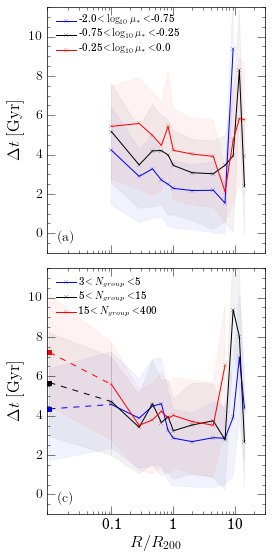

In [185]:
P.figure(figsize=(4, 8))
ax1 = P.subplot(212)
for n in range(0, len(N_bins)-1):
    ax1.plot(r_bins[:-1], bs_N_qsat[:,n], marker='x', color=colours[n], label=r''+str(N_bins[n])+'$ < N_{group} < $'+str(N_bins[n+1]), linewidth=1)
    ax1.fill_between(r_bins[:-1], y1=bs_N_qsat_min[:,n], y2=bs_N_qsat_max[:,n], color=colours[n], alpha=0.05)
    ax1.plot([0.01, r_bins[0]], [bs_N_qcent[n], bs_N_qsat[0,n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([0.01, r_bins[0]], y1=[bs_N_qcent_min[n], bs_N_qsat_min[0,n]], y2=[bs_N_qcent_max[n], bs_N_qsat_max[0,n]], color=colours[n], alpha=0.05)    
    #ax1.plot([r_bins[-2], 25], [bs_N_qsat[-1,n], bs_N_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    #ax1.fill_between([r_bins[-2], 25], y1=[bs_N_qsat_min[-1,n], bs_N_qfield_max[n]], y2=[bs_N_qsat_max[-1,n], bs_N_qfield_min[n]], color=colours[n], alpha=0.05)   
    ax1.scatter(0.01, bs_N_qcent[n], marker='s', s=20, color=colours[n])
    #ax1.scatter(25, bs_N_qfield[n], marker='o', s=20, color=colours[n])
#ax1.plot([r_bins[-5], 25], [bs_N_qsat[-4,n], bs_N_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
#ax1.fill_between([r_bins[-5], 25], y1=[bs_N_qsat_min[-4,n], bs_N_qfield_max[n]], y2=[bs_N_qsat_max[-4,n], bs_N_qfield_min[n]], color=colours[n], alpha=0.05)   
ax1.set_ylabel(r'$\Delta t$ $\rm{[Gyr]}$')
ax1.set_xscale('log')
ax1.minorticks_on()
ax1.set_xlim(0.009, 30)
ax1.set_ylim(-1, 11.5)
ax1.legend(frameon=False, loc=2, fontsize=10)
ax1.set_xticks([0.1, 1, 10])
ax1.set_xticklabels([0.1, 1, 10])
ax1.set_xlabel(r'$R/R_{200}$')
ax1.text(0.05, 0.05, r'$\rm(c)$', transform=ax1.transAxes, ha='left', color='k')
ax1 = P.subplot(211)
for n in range(0, len(v_bins)-1):
    ax1.plot(r_bins[:-1], bs_mu_qsat[:,n], marker='x', color=colours[n], label=r''+str(mu_bins[n])+'$ < \log_{10}{\mu_*} < $'+str(mu_bins[n+1]), linewidth=1)
    ax1.fill_between(r_bins[:-1], y1=bs_mu_qsat_min[:,n], y2=bs_mu_qsat_max[:,n], color=colours[n], alpha=0.05)
    #ax1.plot([0.01, r_bins[0]], [bs_mu_qcent[n], bs_mu_qsat[0,n]], marker='None', color=colours[n], linestyle='dashed', linewidth=2)
    #ax1.fill_between([0.01, r_bins[0]], y1=[bs_mc_qcent_min[n], bs_mc_qsat_min[0,n]], y2=[bs_mc_qcent_max[n], bs_mc_qsat_max[0,n]], color=colours[n], alpha=0.05)
    #ax1.plot([r_bins[-2], 25], [bs_mu_qsat[-1,n], bs_mu_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=2)
    #ax1.fill_between([r_bins[-2], 25], y1=[bs_mc_qsat_min[-1,n], bs_mc_qfield_max[n]], y2=[bs_mc_qsat_max[-1,n], bs_mc_qfield_min[n]], color=colours[n], alpha=0.05)
    #ax1.scatter(0.01, bs_v_disp_qcent[n], marker='s', s=20, color=colours[n])
    #ax1.scatter(25, bs_v_disp_qfield[n], marker='o', s=20, color=colours[n])
ax1.set_ylabel(r'$\Delta t$ $\rm{[Gyr]}$')
ax1.set_xscale('log')
ax1.minorticks_on()
ax1.set_xlim(0.009, 30)
ax1.set_ylim(-1, 11.5)
ax1.set_xticks([0.1, 1, 10])
ax1.set_xticklabels([0.1, 1, 10])
ax1.tick_params(labelbottom='off')
ax1.legend(frameon=False, loc=2, fontsize=10)
ax1.text(0.05, 0.05, r'$\rm(a)$', transform=ax1.transAxes, ha='left', color='k')
P.tight_layout()
P.savefig('time_since_quenching_mu_Ngroup_new.pdf')

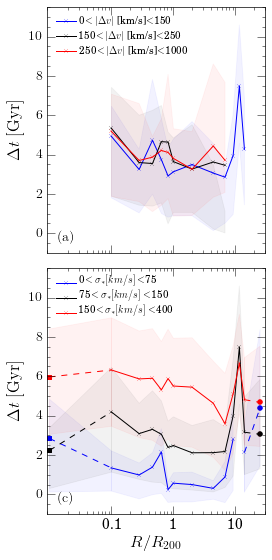

In [186]:
P.figure(figsize=(4, 8))
ax1 = P.subplot(211)
for n in range(0, len(v_bins)-1):
    ax1.plot(r_bins[:-1], bs_delv_qsat[:,n], marker='x', color=colours[n], label=r''+str(delv_bins[n])+'$ <|\Delta v|$ [km/s]$ < $'+str(delv_bins[n+1]), linewidth=1)
    ax1.fill_between(r_bins[:-1], y1=bs_delv_qsat_min[:,n], y2=bs_delv_qsat_max[:,n], color=colours[n], alpha=0.05)
    #ax1.plot([0.01, r_bins[0]], [bs_mu_qcent[n], bs_mu_qsat[0,n]], marker='None', color=colours[n], linestyle='dashed', linewidth=2)
    #ax1.fill_between([0.01, r_bins[0]], y1=[bs_mc_qcent_min[n], bs_mc_qsat_min[0,n]], y2=[bs_mc_qcent_max[n], bs_mc_qsat_max[0,n]], color=colours[n], alpha=0.2)
    #ax1.plot([r_bins[-2], 25], [bs_mu_qsat[-1,n], bs_mu_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=2)
    #ax1.fill_between([r_bins[-2], 25], y1=[bs_mc_qsat_min[-1,n], bs_mc_qfield_max[n]], y2=[bs_mc_qsat_max[-1,n], bs_mc_qfield_min[n]], color=colours[n], alpha=0.2)
    #ax1.scatter(0.01, bs_v_disp_qcent[n], marker='s', s=20, color=colours[n])
    #ax1.scatter(25, bs_v_disp_qfield[n], marker='o', s=20, color=colours[n])
ax1.set_ylabel(r'$\Delta t$ $\rm{[Gyr]}$')
ax1.set_xscale('log')
ax1.minorticks_on()
ax1.set_xlim(0.009, 30)
ax1.set_ylim(-1, 11.5)
ax1.set_xticks([0.1, 1, 10])
ax1.set_xticklabels([0.1, 1, 10])
ax1.tick_params(labelbottom='off')
ax1.legend(frameon=False, loc=2, fontsize=10)
ax1.text(0.05, 0.05, r'$\rm(a)$', transform=ax1.transAxes, ha='left', color='k')
ax1 = P.subplot(212)
for n in range(0, len(v_bins)-1):
    ax1.plot(r_bins[:-1], bs_v_disp_qsat[:,n], marker='x', color=colours[n], label=r''+str(v_bins[n])+'$ < \sigma_* [km/s] < $'+str(v_bins[n+1]), linewidth=1)
    ax1.fill_between(r_bins[:-1], y1=bs_v_disp_qsat_min[:,n], y2=bs_v_disp_qsat_max[:,n], color=colours[n], alpha=0.05)
    ax1.plot([0.01, r_bins[0]], [bs_v_disp_qcent[n], bs_v_disp_qsat[0,n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([0.01, r_bins[0]], y1=[bs_v_disp_qcent_min[n], bs_v_disp_qsat_min[0,n]], y2=[bs_v_disp_qcent_max[n], bs_v_disp_qsat_max[0,n]], color=colours[n], alpha=0.05)
    ax1.plot([r_bins[-2], 25], [bs_v_disp_qsat[-1,n], bs_v_disp_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([r_bins[-2], 25], y1=[bs_v_disp_qsat_min[-1,n], bs_v_disp_qfield_min[n]], y2=[bs_v_disp_qsat_max[-1,n], bs_v_disp_qfield_max[n]], color=colours[n], alpha=0.05)
    ax1.scatter(0.01, bs_v_disp_qcent[n], marker='s', s=20, color=colours[n])
    ax1.scatter(25, bs_v_disp_qfield[n], marker='o', s=20, color=colours[n])
ax1.set_ylabel(r'$\Delta t$ $\rm{[Gyr]}$')
#ax1.set_xlabel(r'$R/R_{200}$')
ax1.set_xscale('log')
ax1.minorticks_on()
ax1.set_xlim(0.009, 30)
ax1.set_ylim(-1, 11.5)
ax1.set_xticks([0.1, 1, 10])
ax1.set_xlabel(r'$R/R_{200}$')
ax1.set_xticklabels([0.1, 1, 10])
ax1.legend(frameon=False, loc=2, fontsize=10)
ax1.text(0.05, 0.05, r'$\rm(c)$', transform=ax1.transAxes, ha='left', color='k')
P.tight_layout()
P.savefig('time_since_quenching_delv_sigma_new.pdf', facecolor='None', edgecolor='None')

#### Now let's make the same plots but for the rate of quenching

In [187]:
tau_min = qsat['best fit tau'] - qsat['minus error tau']
tau_max = qsat['best fit tau'] + qsat['plus error tau']

cent_tau_min = qcent['best fit tau'] - qcent['minus error tau']
cent_tau_max = qcent['best fit tau'] + qcent['plus error tau']

field_tau_min = qfieldc['best fit tau'] - qfieldc['minus error tau']
field_tau_max = qfieldc['best fit tau'] + qfieldc['plus error tau']

In [188]:
bs_m_qsat, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['AVG_MASS_1'], qsat['best fit tau'], bins=(r_bins, m_bins), statistic='median')
bs_m_qsat_min, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['AVG_MASS_1'], tau_min, bins=(r_bins, m_bins), statistic='median')
bs_m_qsat_max, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['AVG_MASS_1'], tau_max, bins=(r_bins, m_bins), statistic='median')
bs_mc_qsat, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['stellar mass of central'], qsat['best fit tau'], bins=(r_bins, mc_bins), statistic='median')
bs_mc_qsat_min, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['stellar mass of central'], tau_min, bins=(r_bins, mc_bins), statistic='median')
bs_mc_qsat_max, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['stellar mass of central'], tau_max, bins=(r_bins, mc_bins), statistic='median')
bs_N_qsat, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['N group'], qsat['best fit tau'], bins=(r_bins, N_bins), statistic='median')
bs_N_qsat_min, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['N group'], tau_min, bins=(r_bins, N_bins), statistic='median')
bs_N_qsat_max, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['N group'], tau_max, bins=(r_bins, N_bins), statistic='median')

bs_m_qcent, x, n = bs(qcent['AVG_MASS_1'], qcent['best fit tau'], bins=m_bins, statistic='median')
bs_m_qcent_min, x, n = bs(qcent['AVG_MASS_1'], cent_tau_min, bins=m_bins, statistic='median')
bs_m_qcent_max, x, n = bs(qcent['AVG_MASS_1'], cent_tau_max, bins=m_bins, statistic='median')
bs_mc_qcent, x, n = bs(qcent['stellar mass of central'], qcent['best fit tau'], bins=mc_bins, statistic='median')
bs_mc_qcent_min, x, n = bs(qcent['stellar mass of central'], cent_tau_min, bins=mc_bins, statistic='median')
bs_mc_qcent_max, x, n = bs(qcent['stellar mass of central'], cent_tau_max, bins=mc_bins, statistic='median')
bs_N_qcent, x, n = bs(qcent['N group'], qcent['best fit tau'], bins=N_bins, statistic='median')
bs_N_qcent_min, x, n = bs(qcent['N group'], cent_tau_min, bins=N_bins, statistic='median')
bs_N_qcent_max, x, n = bs(qcent['N group'], cent_tau_max, bins=N_bins, statistic='median')

bs_m_qfield, x, n = bs(qfieldc['AVG_MASS'], qfieldc['best fit tau'], bins=m_bins, statistic='median')
bs_m_qfield_min, x, n = bs(qfieldc['AVG_MASS'], field_tau_min, bins=m_bins, statistic='median')
bs_m_qfield_max, x, n = bs(qfieldc['AVG_MASS'], field_tau_max, bins=m_bins, statistic='median')
bs_mc_qfield, x, n = bs(qfieldc['AVG_MASS'], qfieldc['best fit tau'], bins=mc_bins, statistic='median')
bs_mc_qfield_min, x, n = bs(qfieldc['AVG_MASS'], field_tau_min, bins=mc_bins, statistic='median')
bs_mc_qfield_max, x, n = bs(qfieldc['AVG_MASS'], field_tau_max, bins=mc_bins, statistic='median')
bs_N_qfield = N.ones_like(bs_mc_qfield)*N.median(qfieldc['best fit tau'])
bs_N_qfield_min = N.ones_like(bs_mc_qfield)*N.median(field_tau_min)
bs_N_qfield_max = N.ones_like(bs_mc_qfield)*N.median(field_tau_max)

In [189]:
bs_v_disp_qsat, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['V_DISP_1'], qsat['best fit tau'], bins=(r_bins, v_bins), statistic='median')
bs_v_disp_qsat_min, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['V_DISP_1'], tau_min, bins=(r_bins, v_bins), statistic='median')
bs_v_disp_qsat_max, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['V_DISP_1'], tau_max, bins=(r_bins, v_bins), statistic='median')
bs_mu_qsat, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], N.log10(10**(qsat['AVG_MASS_1'])/10**(qsat['stellar mass of central'])), qsat['best fit tau'], bins=(r_bins, mu_bins), statistic='median')
bs_mu_qsat_min, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], N.log10(10**(qsat['AVG_MASS_1'])/10**(qsat['stellar mass of central'])), tau_min, bins=(r_bins, mu_bins), statistic='median')
bs_mu_qsat_max, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], N.log10(10**(qsat['AVG_MASS_1'])/10**(qsat['stellar mass of central'])), tau_max, bins=(r_bins, mu_bins), statistic='median')
bs_delv_qsat, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['delta v from central'], qsat['best fit tau'], bins=(r_bins, delv_bins), statistic='median')
bs_delv_qsat_min, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['delta v from central'], tau_min, bins=(r_bins, delv_bins), statistic='median')
bs_delv_qsat_max, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['delta v from central'], tau_max, bins=(r_bins, delv_bins), statistic='median')

bs_v_disp_qcent, x, n = bs(qcent['V_DISP_1'], qcent['best fit tau'], bins=v_bins, statistic='median')
bs_v_disp_qcent_min, x, n = bs(qcent['V_DISP_1'], cent_tau_min, bins=v_bins, statistic='median')
bs_v_disp_qcent_max, x, n = bs(qcent['V_DISP_1'], cent_tau_max, bins=v_bins, statistic='median')

bs_v_disp_qfield, x, n = bs(qfieldc['V_DISP'], qfieldc['best fit tau'], bins=v_bins, statistic='median')
bs_v_disp_qfield_min, x, n = bs(qfieldc['V_DISP'], field_tau_min, bins=v_bins, statistic='median')
bs_v_disp_qfield_max, x, n = bs(qfieldc['V_DISP'], field_tau_max, bins=v_bins, statistic='median')


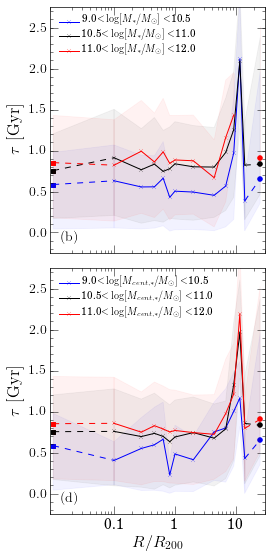

In [190]:
P.figure(figsize=(4, 8))
ax1 = P.subplot(211)
for n in range(0, len(m_bins)-1):
    ax1.plot(r_bins[:-1], bs_m_qsat[:,n], marker='x', color=colours[n], label=r''+str(m_bins[n])+'$ < \log [M_*/M_{\odot}] < $'+str(m_bins[n+1]), linewidth=1)
    ax1.fill_between(r_bins[:-1], y1=bs_m_qsat_min[:,n], y2=bs_m_qsat_max[:,n], color=colours[n], alpha=0.05)
    #ax1.errorbar(r_bins[:-1], bs_m_qsat[:,n], yerr = [bs_m_qsat_min[:,n], bs_m_qsat_max[:,n]], marker='None', fmt='None', ecolor=colours[n], alpha=0.8)
    ax1.plot([0.01, r_bins[0]], [bs_m_qcent[n], bs_m_qsat[0,n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([0.01, r_bins[0]], y1=[bs_m_qcent_min[n], bs_m_qsat_min[0,n]], y2=[bs_m_qcent_max[n], bs_m_qsat_max[0,n]], color=colours[n], alpha=0.05)
    ax1.plot([r_bins[-2], 25], [bs_m_qsat[-1,n], bs_m_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([r_bins[-2], 25], y1=[bs_m_qsat_min[-1,n], bs_m_qfield_min[n]], y2=[bs_m_qsat_max[-1,n], bs_m_qfield_max[n]], color=colours[n], alpha=0.05)
    ax1.scatter(0.01, bs_m_qcent[n], marker='s', s=20, color=colours[n])
    ax1.scatter(25, bs_m_qfield[n], marker='o', s=20, color=colours[n])
ax1.plot([r_bins[-4], r_bins[-2]], [bs_m_qsat[-3,n], bs_m_qsat[-1,n]], marker='None', color=colours[n], linewidth=1)
ax1.fill_between([r_bins[-4], r_bins[-2]], y1=[bs_m_qsat_min[-3, n], bs_m_qsat_min[-1,n]], y2=[bs_m_qsat_max[-3, n], bs_m_qsat_max[-1,n]], color=colours[n], alpha=0.05)
ax1.set_ylabel(r'$\tau$ $\rm{[Gyr]}$')
#ax1.set_xlabel(r'$R/R_{200}$')
ax1.set_xscale('log')
ax1.minorticks_on()
ax1.set_xlim(0.009, 30)
ax1.set_ylim(-0.25, 2.75)
ax1.legend(frameon=False, loc=2, fontsize=10)
ax1.set_xticks([0.1, 1, 10])
#ax1.set_xticklabels([0.1, 1, 10])
ax1.tick_params(labelbottom='off')
ax1.text(0.05, 0.05, r'$\rm(b)$', transform=ax1.transAxes, ha='left', color='k')
ax1 = P.subplot(212)
for n in range(0, len(mc_bins)-1):
    ax1.plot(r_bins[:-1], bs_mc_qsat[:,n], marker='x', color=colours[n], label=r''+str(mc_bins[n])+'$ < \log [M_{cent,*}/M_{\odot}] < $'+str(mc_bins[n+1]), linewidth=1)
    ax1.fill_between(r_bins[:-1], y1=bs_mc_qsat_min[:,n], y2=bs_mc_qsat_max[:,n], color=colours[n], alpha=0.05)
    ax1.plot([0.01, r_bins[0]], [bs_mc_qcent[n], bs_mc_qsat[0,n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([0.01, r_bins[0]], y1=[bs_mc_qcent_min[n], bs_mc_qsat_min[0,n]], y2=[bs_mc_qcent_max[n], bs_mc_qsat_max[0,n]], color=colours[n], alpha=0.05)
    ax1.plot([r_bins[-2], 25], [bs_mc_qsat[-1,n], bs_mc_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([r_bins[-2], 25], y1=[bs_mc_qsat_min[-1,n], bs_mc_qfield_min[n]], y2=[bs_mc_qsat_max[-1,n], bs_mc_qfield_max[n]], color=colours[n], alpha=0.05)
    ax1.scatter(0.01, bs_mc_qcent[n], marker='s', s=20, color=colours[n])
    ax1.scatter(25, bs_mc_qfield[n], marker='o', s=20, color=colours[n])
ax1.set_ylabel(r'$\tau$ $\rm{[Gyr]}$')
ax1.set_xlabel(r'$R/R_{200}$')
ax1.set_xscale('log')
ax1.minorticks_on()
ax1.set_xlim(0.009, 30)
ax1.set_ylim(-0.25, 2.75)
ax1.set_xticks([0.1, 1, 10])
ax1.set_xticklabels([0.1, 1, 10])
#ax1.tick_params(labelbottom='off')
ax1.legend(frameon=False, loc=2, fontsize=10)
ax1.text(0.05, 0.05, r'$\rm(d)$', transform=ax1.transAxes, ha='left', color='k')
P.tight_layout()
P.savefig('rate_of_quenching_M*_Mh_new.pdf', facecolor='None', edgecolor='None')

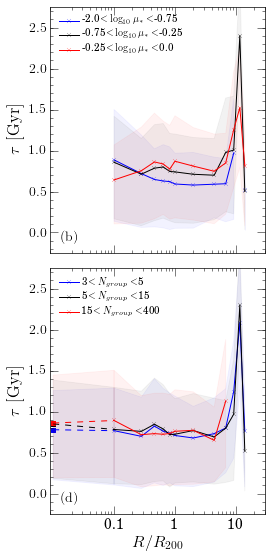

In [191]:
P.figure(figsize=(4, 8))
ax1 = P.subplot(212)
for n in range(0, len(N_bins)-1):
    ax1.plot(r_bins[:-1], bs_N_qsat[:,n], marker='x', color=colours[n], label=r''+str(N_bins[n])+'$ < N_{group} < $'+str(N_bins[n+1]), linewidth=1)
    ax1.fill_between(r_bins[:-1], y1=bs_N_qsat_min[:,n], y2=bs_N_qsat_max[:,n], color=colours[n], alpha=0.05)
    ax1.plot([0.01, r_bins[0]], [bs_N_qcent[n], bs_N_qsat[0,n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([0.01, r_bins[0]], y1=[bs_N_qcent_min[n], bs_N_qsat_min[0,n]], y2=[bs_N_qcent_max[n], bs_N_qsat_max[0,n]], color=colours[n], alpha=0.05)    
    #ax1.plot([r_bins[-2], 25], [bs_N_qsat[-1,n], bs_N_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    #ax1.fill_between([r_bins[-2], 25], y1=[bs_N_qsat_min[-1,n], bs_N_qfield_max[n]], y2=[bs_N_qsat_max[-1,n], bs_N_qfield_min[n]], color=colours[n], alpha=0.05)   
    ax1.scatter(0.01, bs_N_qcent[n], marker='s', s=20, color=colours[n])
    #ax1.scatter(25, bs_N_qfield[n], marker='o', s=20, color=colours[n])
#ax1.plot([r_bins[-5], 25], [bs_N_qsat[-4,n], bs_N_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
#ax1.fill_between([r_bins[-5], 25], y1=[bs_N_qsat_min[-4,n], bs_N_qfield_max[n]], y2=[bs_N_qsat_max[-4,n], bs_N_qfield_min[n]], color=colours[n], alpha=0.05)   
ax1.set_ylabel(r'$\tau$ $\rm{[Gyr]}$')
ax1.set_xlabel(r'$R/R_{200}$')
ax1.set_xscale('log')
ax1.minorticks_on()
ax1.set_xlim(0.009, 30)
ax1.set_ylim(-0.25, 2.75)
ax1.legend(frameon=False, loc=2, fontsize=10)
ax1.set_xticks([0.1, 1, 10])
ax1.set_xticklabels([0.1, 1, 10])
ax1.text(0.05, 0.05, r'$\rm(d)$', transform=ax1.transAxes, ha='left', color='k')
ax1 = P.subplot(211)
for n in range(0, len(v_bins)-1):
    ax1.plot(r_bins[:-1], bs_mu_qsat[:,n], marker='x', color=colours[n], label=r''+str(mu_bins[n])+'$ < \log_{10}{\mu_*} < $'+str(mu_bins[n+1]), linewidth=1)
    ax1.fill_between(r_bins[:-1], y1=bs_mu_qsat_min[:,n], y2=bs_mu_qsat_max[:,n], color=colours[n], alpha=0.05)
    #ax1.plot([0.01, r_bins[0]], [bs_mu_qcent[n], bs_mu_qsat[0,n]], marker='None', color=colours[n], linestyle='dashed', linewidth=2)
    #ax1.fill_between([0.01, r_bins[0]], y1=[bs_mc_qcent_min[n], bs_mc_qsat_min[0,n]], y2=[bs_mc_qcent_max[n], bs_mc_qsat_max[0,n]], color=colours[n], alpha=0.05)
    #ax1.plot([r_bins[-2], 25], [bs_mu_qsat[-1,n], bs_mu_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=2)
    #ax1.fill_between([r_bins[-2], 25], y1=[bs_mc_qsat_min[-1,n], bs_mc_qfield_max[n]], y2=[bs_mc_qsat_max[-1,n], bs_mc_qfield_min[n]], color=colours[n], alpha=0.05)
    #ax1.scatter(0.01, bs_v_disp_qcent[n], marker='s', s=20, color=colours[n])
    #ax1.scatter(25, bs_v_disp_qfield[n], marker='o', s=20, color=colours[n])
ax1.set_ylabel(r'$\tau$ $\rm{[Gyr]}$')
ax1.set_xscale('log')
ax1.minorticks_on()
ax1.set_xlim(0.009, 30)
ax1.set_ylim(-0.25, 2.75)
ax1.set_xticks([0.1, 1, 10])
ax1.set_xticklabels([0.1, 1, 10])
ax1.tick_params(labelbottom='off')
ax1.text(0.05, 0.05, r'$\rm(b)$', transform=ax1.transAxes, ha='left', color='k')
ax1.legend(frameon=False, loc=2, fontsize=10)
P.savefig('rate_of_quenching_mu_Ngroup_new.pdf')

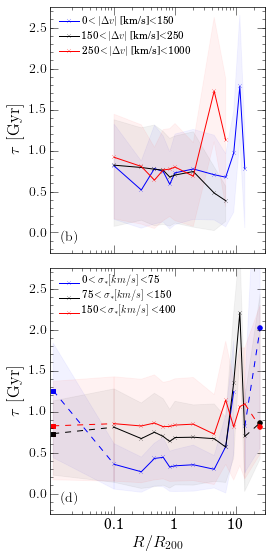

In [192]:
P.figure(figsize=(4, 8))
ax1 = P.subplot(211)
for n in range(0, len(v_bins)-1):
    ax1.plot(r_bins[:-1], bs_delv_qsat[:,n], marker='x', color=colours[n], label=r''+str(delv_bins[n])+'$ <|\Delta v|$ [km/s]$ < $'+str(delv_bins[n+1]), linewidth=1)
    ax1.fill_between(r_bins[:-1], y1=bs_delv_qsat_min[:,n], y2=bs_delv_qsat_max[:,n], color=colours[n], alpha=0.05)
    #ax1.plot([0.01, r_bins[0]], [bs_mu_qcent[n], bs_mu_qsat[0,n]], marker='None', color=colours[n], linestyle='dashed', linewidth=2)
    #ax1.fill_between([0.01, r_bins[0]], y1=[bs_mc_qcent_min[n], bs_mc_qsat_min[0,n]], y2=[bs_mc_qcent_max[n], bs_mc_qsat_max[0,n]], color=colours[n], alpha=0.2)
    #ax1.plot([r_bins[-2], 25], [bs_mu_qsat[-1,n], bs_mu_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=2)
    #ax1.fill_between([r_bins[-2], 25], y1=[bs_mc_qsat_min[-1,n], bs_mc_qfield_max[n]], y2=[bs_mc_qsat_max[-1,n], bs_mc_qfield_min[n]], color=colours[n], alpha=0.2)
    #ax1.scatter(0.01, bs_v_disp_qcent[n], marker='s', s=20, color=colours[n])
    #ax1.scatter(25, bs_v_disp_qfield[n], marker='o', s=20, color=colours[n])
ax1.set_ylabel(r'$\tau$ $\rm{[Gyr]}$')
ax1.set_xscale('log')
ax1.minorticks_on()
ax1.set_xlim(0.009, 30)
ax1.set_ylim(-0.25, 2.75)
ax1.set_xticks([0.1, 1, 10])
ax1.set_xticklabels([0.1, 1, 10])
ax1.tick_params(labelbottom='off')
ax1.legend(frameon=False, loc=2, fontsize=10)
ax1.text(0.05, 0.05, r'$\rm(b)$', transform=ax1.transAxes, ha='left', color='k')
ax1 = P.subplot(212)
for n in range(0, len(v_bins)-1):
    ax1.plot(r_bins[:-1], bs_v_disp_qsat[:,n], marker='x', color=colours[n], label=r''+str(v_bins[n])+'$ < \sigma_* [km/s] < $'+str(v_bins[n+1]), linewidth=1)
    ax1.fill_between(r_bins[:-1], y1=bs_v_disp_qsat_min[:,n], y2=bs_v_disp_qsat_max[:,n], color=colours[n], alpha=0.05)
    ax1.plot([0.01, r_bins[0]], [bs_v_disp_qcent[n], bs_v_disp_qsat[0,n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([0.01, r_bins[0]], y1=[bs_v_disp_qcent_min[n], bs_v_disp_qsat_min[0,n]], y2=[bs_v_disp_qcent_max[n], bs_v_disp_qsat_max[0,n]], color=colours[n], alpha=0.05)
    ax1.plot([r_bins[-2], 25], [bs_v_disp_qsat[-1,n], bs_v_disp_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([r_bins[-2], 25], y1=[bs_v_disp_qsat_min[-1,n], bs_v_disp_qfield_min[n]], y2=[bs_v_disp_qsat_max[-1,n], bs_v_disp_qfield_max[n]], color=colours[n], alpha=0.05)
    ax1.scatter(0.01, bs_v_disp_qcent[n], marker='s', s=20, color=colours[n])
    ax1.scatter(25, bs_v_disp_qfield[n], marker='o', s=20, color=colours[n])
ax1.set_ylabel(r'$\tau$ $\rm{[Gyr]}$')
#ax1.set_xlabel(r'$R/R_{200}$')
ax1.set_xscale('log')
ax1.minorticks_on()
ax1.set_xlim(0.009, 30)
ax1.set_ylim(-0.25, 2.75)
ax1.set_xticks([0.1, 1, 10])
ax1.set_xlabel(r'$R/R_{200}$')
ax1.set_xticklabels([0.1, 1, 10])
ax1.legend(frameon=False, loc=2, fontsize=10)
ax1.text(0.05, 0.05, r'$\rm(d)$', transform=ax1.transAxes, ha='left', color='k')
P.tight_layout()
P.savefig('rate_of_quenching_delv_sigma_new.pdf', facecolor='None', edgecolor='None')